The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)
x_train [[ 2.95  2.09]
 [-3.33 -0.44]
 [ 3.87  2.91]
 [ 1.59  1.25]
 [-1.64 -1.96]
 [ 0.39 -1.99]
 [ 0.77 -1.14]
 [-2.94 -4.47]
 [ 1.36  2.68]
 [ 1.56  3.85]
 [-2.59 -2.21]
 [-5.27 -0.78]
 [ 2.3   3.33]
 [-1.48 -1.17]
 [-2.84 -4.12]
 [-1.14 -2.66]
 [ 0.9   2.05]
 [ 1.31  1.85]
 [-2.64 -2.2 ]
 [-1.69  0.8 ]
 [ 0.97  2.68]
 [ 1.96  0.83]
 [ 1.93  3.71]
 [-1.05 -3.85]
 [ 1.65  0.63]
 [-1.45 -2.26]
 [ 1.5   3.93]
 [-1.84 -1.13]
 [-2.26  0.01]
 [ 1.54  2.02]
 [ 1.2   1.31]
 [-1.41 -0.33]
 [ 2.4   0.91]
 [-0.37 -1.91]
 [ 2.58  1.79]
 [ 3.13  0.92]
 [ 1.73  2.8 ]
 [-2.19 -1.48]
 [ 0.02 -0.02]
 [ 1.26  1.17]
 [-0.68 -1.52]
 [-2.95 -1.16]
 [ 2.52  1.83]
 [-0.05 -1.95]
 [ 0.51  2.44]
 [-1.08 -1.23]
 [ 1.23  2.54]
 [-2.14 -1.62]
 [-3.96 -2.  ]
 [-0.63 -1.53]
 [ 1.9   1.34]
 [ 2.92  2.32]
 [-2.42 -3.35]
 [ 0.68  1.54]
 [-1.5   0.34]
 [ 2.63  0.4 ]
 [

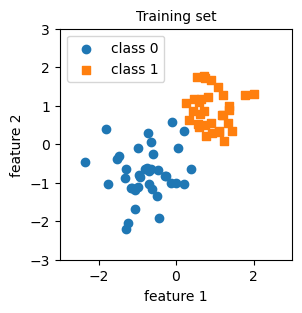

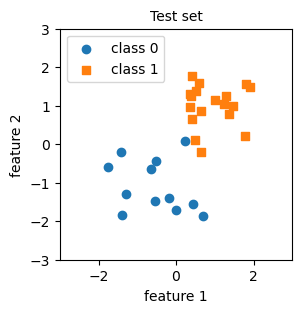

In [62]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import torch
import numpy as np

data = np.genfromtxt('./data/perceptron_toydata.txt', 
                     delimiter='\t')

x = data[:, :2] 
y= data[:,2].astype(np.int32) 
# print(y)

print('Class label counts:', np.bincount(y))
print('X.shape:', x.shape)
print('y.shape:', y.shape)

# implement random shuffling by hand, just for demonstration
shuffle_idx = np.arange(y.shape[0])      
shuffle_rng = np.random.RandomState(123) #always get the same random number for this state. 123 is state name
shuffle_rng.shuffle(shuffle_idx) #if we dont want to use shuffle_rng then for random numbers, np.random.shuffle(shuffle_idx)

x = x[shuffle_idx]
y = y[shuffle_idx]

# split the data into 70% training, 30% testing
x_train, x_test = x[shuffle_idx[:70]], x[shuffle_idx[70:]]

y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# print("x_train", x_train)
# print("y_train", y_train)

mu, sigma = x_train.mean(axis=0), X_train.std(axis=0) # compute mean & std. deviation

# print("Mean along colum before:     ", X_train.mean(axis=0))
# print("Std. dev along colum before: ", X_train.std(axis=0))

x_train = (x_train - mu) / sigma # this is done in order to take mean to zero. Output is not exactly zero but tend to zero
x_test = (x_test - mu) / sigma # take standard deviation to 1

#less standard deviation means data is not far away from origin and mean 0 means the data is more centered to origin. 


# let's check if we have mean 0 and std. dev. 1 per column
print("Mean along colum:     ", x_train.mean(axis=0)) #axis=0 refers to the column. ie. column wise mean for each column
print("Std. dev along colum: ", x_train.std(axis=0))

# add a column of all ones to X, such that each row is [x_1, x_2, 1]
x_train = np.c_[ x_train, np.ones(x_train.shape[0])]
x_test  = np.c_[ x_test, np.ones(x_test.shape[0])]


plt.figure(figsize=(3,3))
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set',fontsize=10)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set', fontsize=10)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()


class Perceptron():
    def __init__(self, num_features):
        """Constructor
        
        Args:
            num_features (int): Number of input features 
                                (excluding the additional '1')
        """
        # number of features for an input, i.e., 2 + 1 in our case (because of the added all-'1' column)
        self.num_features = num_features + 1
        # initialize the weights to 0
        self.weights = np.zeros((self.num_features, 1), dtype=np.float32)

        
    def forward(self, x):
        """Computes the perceptron output.
        
        Args:
            x (np.array): Input data; shape = (N, num_features + 1)
            
        Returns:
            y (np.array): Predictions (0/1)
        """
        output = np.dot(x, self.weights) # compute <w,x> = w^T x
        # if output > 0 => assign 1, otherwise assign 0
        predictions = np.where(output > 0., 1, 0)
        return predictions
        
    def compute_errors(self, x, y):
        """Perceptron error computation.
        
        Args:
            x (np.array): Input data; shape = (N, num_features + 1)
            y (np.array): True labels of input featuers (0/1)
            
        Returns:
            e (np.array): errors (in {+/- 1})
        """
        # run data through the perceptron model
        predictions = self.forward(x)
        # compute errors
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        """Implementation of the perceptron learning rule.
        
        Args: 
            x (np.array): Input features
            y (np.array): Labels of input features (0/1)
            epochs (int): Number of times to run through the data
        """
        # go over the training data epoch times
        for e in range(epochs):
            
            # iterate over all training samples
            for i in range(y.shape[0]):
                
                # compute perceptron errors
                errors = self.compute_errors(
                    x[i].reshape(1, self.num_features), #transform to 2d array with 1 row and 3 columns by reshaping ie. format: [[-3.33, -0.44, 1.0]] & because weight is 3*1 array
                    y[i])
                # make sure we just have a vector
                errors = errors.reshape(-1)
                # update weight
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                
    def evaluate(self, x, y):
        """Computes accuracy of perceptron model.
        
        Args:
            x (np.array): Input features
            y (np.array): Labels of input features (0/1)
            
        Returns:
            acc (float): Accuracy (in [0,1]) of perceptron model on input data.
        """
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0] #dividing the total number of correct predictions by the total number of samples
        return accuracy

